# Introduction to Astronomy - Tutorial 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
lamb, flux, flux_err, cont = np.loadtxt("Resources/test_fort.17",
            usecols=(0,1,2,3),
            unpack=True,
            skiprows=1,
            comments='!'
            )

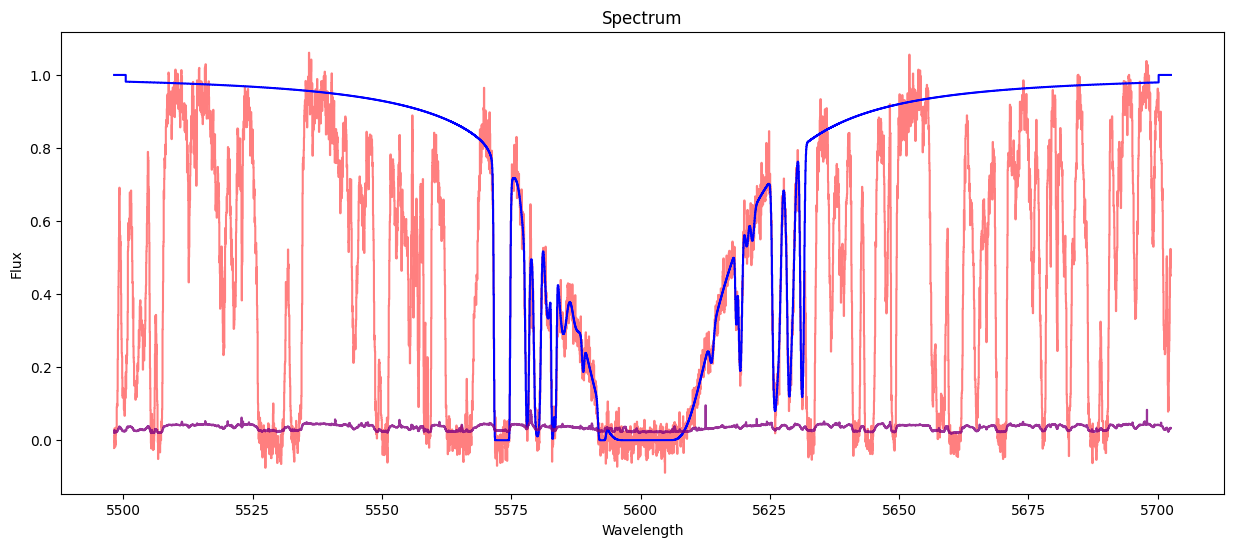

In [11]:
plt.figure(figsize=(15,6))
plt.step(lamb, flux, color='red', alpha=0.5)
plt.step(lamb, cont, color='blue')
plt.step(lamb, flux_err, color='purple', alpha=0.8)
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.title("Spectrum")
plt.show()

In [12]:
import astropy
from astropy import units as u
from astropy.io import fits

In [13]:
f = fits.open("Resources/test_spec.fits")
f.info()

Filename: Resources/test_spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (3721,)   float32   
  1                1 ImageHDU        15   (3721,)   float32   


In [14]:
f[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 3721                                                  
EXTEND  =                    T                                                  
BUNIT   = '10**(-20)*erg/s/cm**2/Angstrom'                                      
OBJECT  = 'Test_spectra_for_GS25' / Name of the spectrum                        
DATE    = '2023-05-12 10:37:40.551064' / Date FITS file was generated           
AUTHOR  = 'Eshita Banerjee'    / Author of this spectrum                        
CRPIX1  =                  1.0                                                  
CRVAL1  =               4700.0                                                  
CDELT1  =                 1.25                                                  
CUNIT1  = 'Angstrom'        

In [15]:
d = f[0].data
hdr = f[0].header
type(d), d.shape

(numpy.ndarray, (3721,))

In [16]:
initial_lambda = hdr['CRVAL1']
delta_lambda = hdr['CDELT1']
nPixels = hdr['NAXIS1']

wavelength = (initial_lambda) + (delta_lambda * np.arange(nPixels))

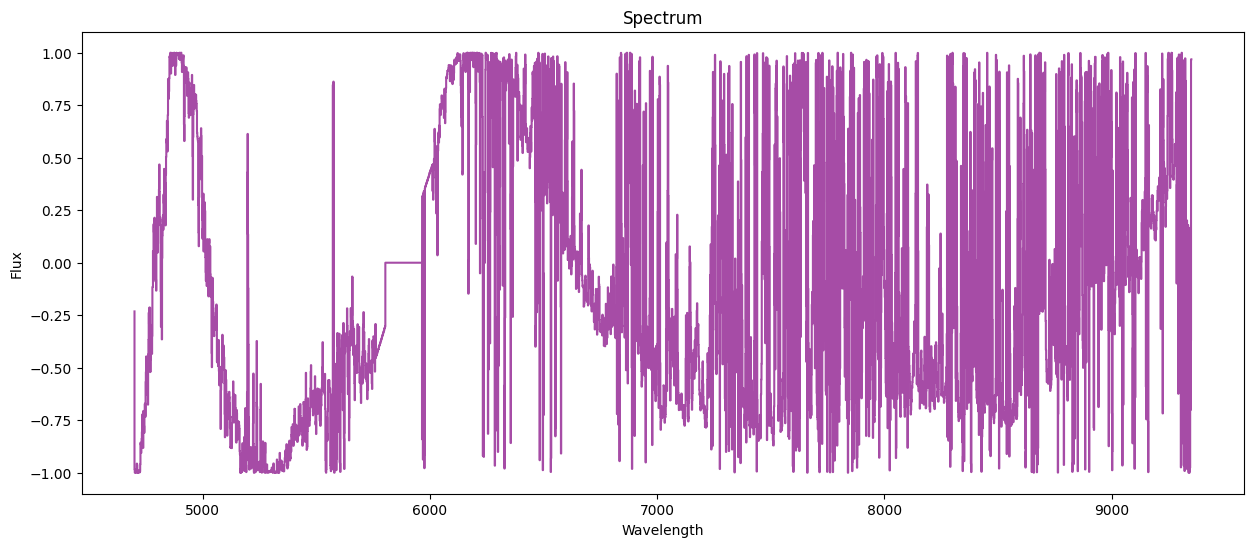

In [17]:
plt.figure(figsize=(15,6))
plt.step(wavelength, d, color='purple', alpha=0.7)
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.title("Spectrum")
plt.show()

Image saved as horsehead_nebula.png


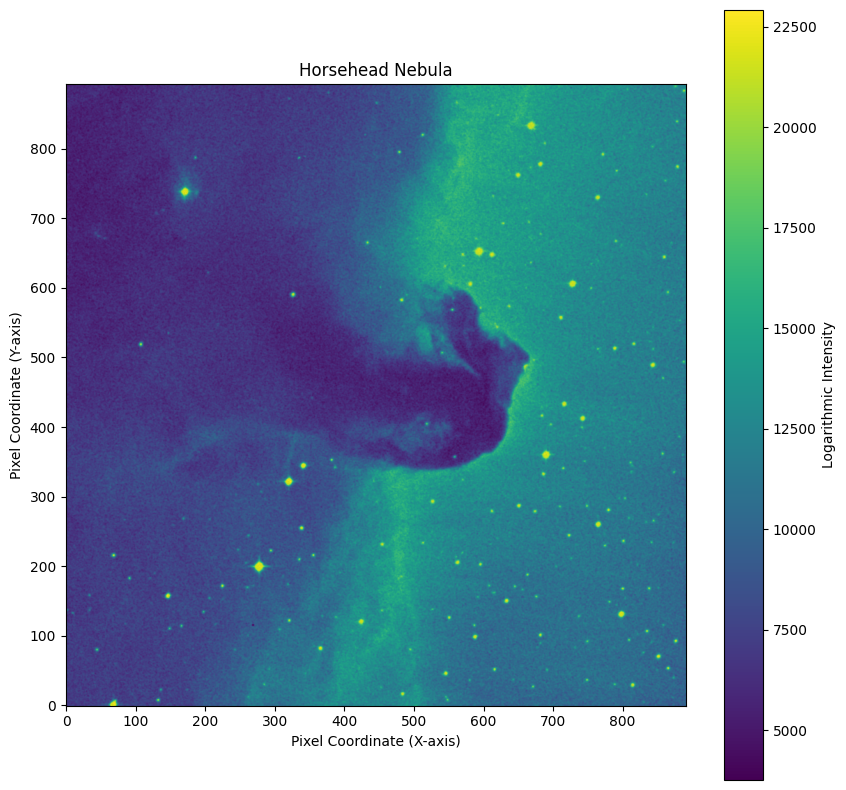

In [21]:
from astropy.wcs import WCS
with fits.open("Resources/HorseHead.fits") as hdul:
    image_data = hdul[0].data
    plt.figure(figsize=(10, 10))
    plt.imshow(image_data, origin='lower')
    plt.colorbar(label='Logarithmic Intensity')

    # Add a title and axis labels for context
    plt.title('Horsehead Nebula')
    plt.xlabel('Pixel Coordinate (X-axis)')
    plt.ylabel('Pixel Coordinate (Y-axis)')

    # Save the figure to a file
    plt.savefig('horsehead_nebula.png')

    print("Image saved as horsehead_nebula.png")

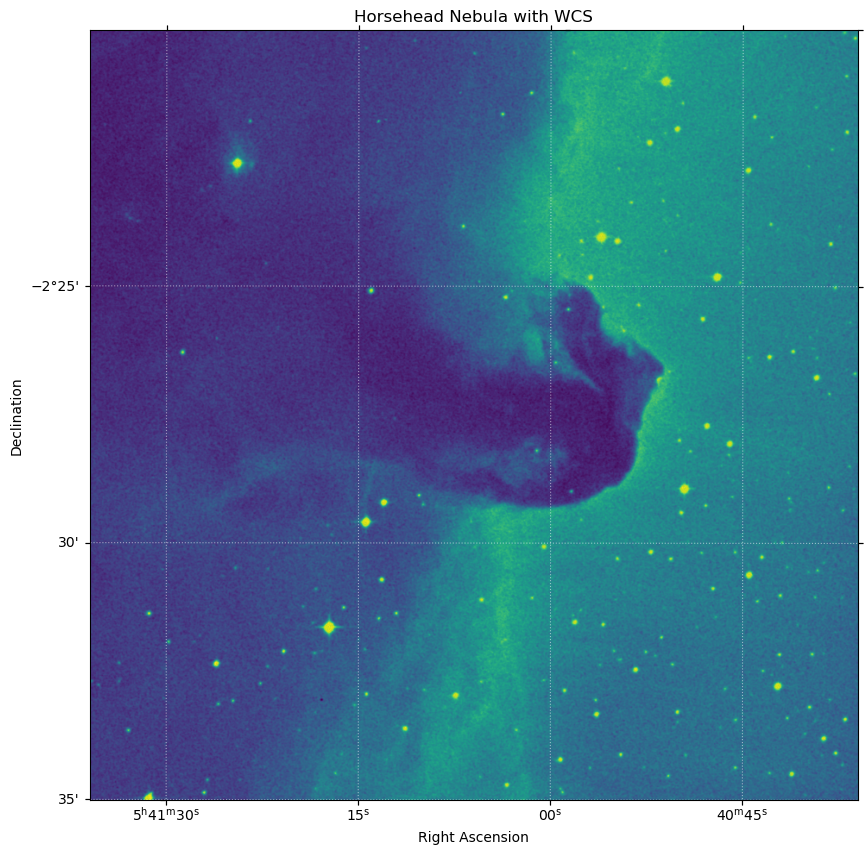

In [ ]:
# Open the FITS file
with fits.open("Resources/HorseHead.fits") as hdul:
    wcs_info = WCS(hdul[0].header)
    image_data = hdul[0].data
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection=wcs_info)
    ax.imshow(image_data, origin='lower')
    ax.set_xlabel('Right Ascension')
    ax.set_ylabel('Declination')
    ax.set_title('Horsehead Nebula with WCS')
    ax.coords.grid(True, color='white', ls='dotted', alpha=0.5)
    plt.savefig('horsehead_nebula_wcs.png')

In [23]:
image_data = file1[0].data
arr1 = np.ravel(image_data)


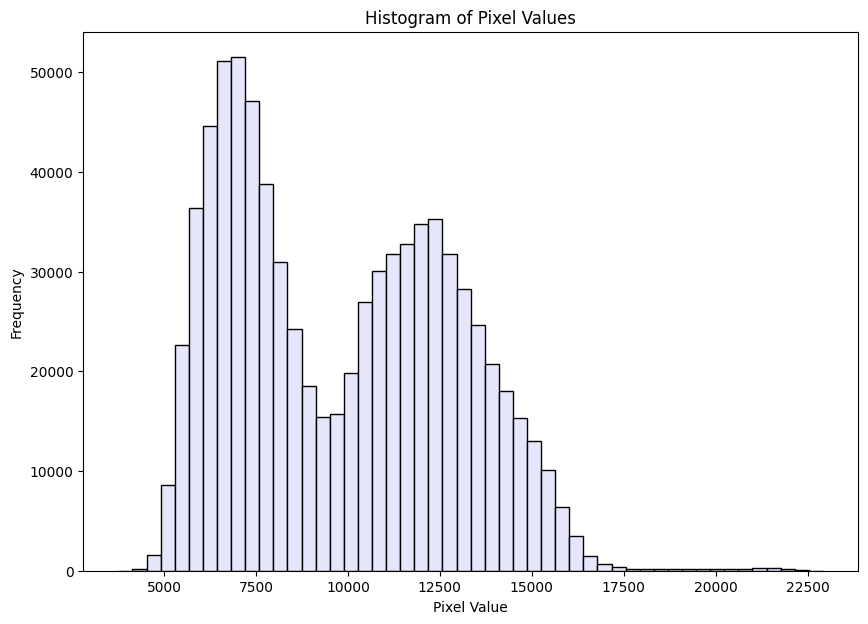

In [33]:
plt.figure(figsize=(10, 7))
plt.hist(arr1, bins=50, color='lavender', edgecolor='black')
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("Histogram of Pixel Values")
plt.show()

In [36]:
# Converting from HMS-DMS to RA-Dec

RA_hms = '13:29:52.34'
Dec_dms = '+47:12:47.4'

coordinates=SkyCoord(ra=RA_hms, dec=Dec_dms, unit=(u.hourangle, u.deg))

RA_deg = coordinates.ra.deg
Dec_deg = coordinates.dec.deg

print(f"RA in degrees: {RA_deg}")
print(f"Dec in degrees: {Dec_deg}")

RA in degrees: 202.4680833333333
Dec in degrees: 47.213166666666666


Filename: Resources/whirpool_legacy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (256, 256, 3)   float32   


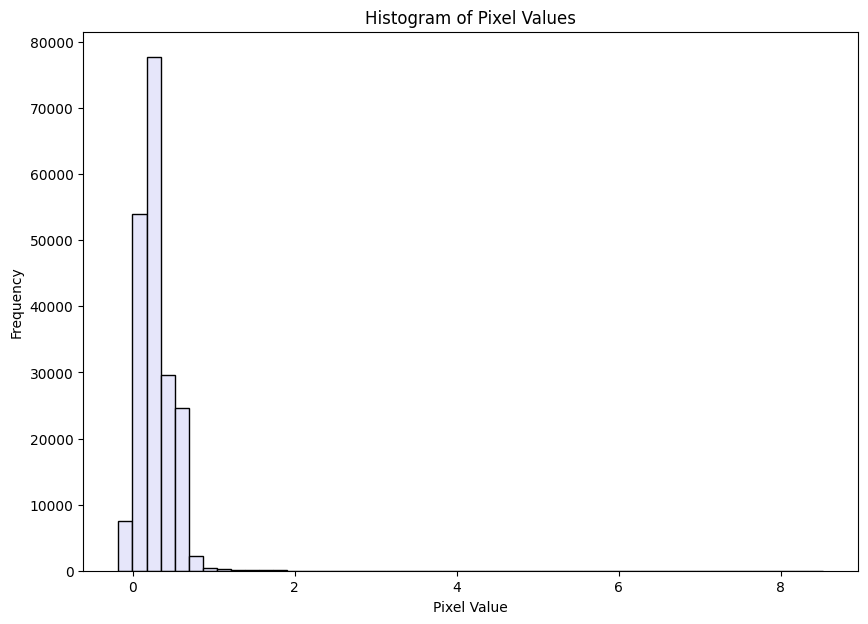

In [40]:
with fits.open("Resources/whirpool_legacy.fits") as fits_whrpool:
    fits_whrpool.info()
    image_data = fits_whrpool[0].data
    arr2 = np.ravel(image_data)
    plt.figure(figsize=(10, 7))
    plt.hist(arr2, bins=50, color='lavender', edgecolor='black')
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.title("Histogram of Pixel Values")
    plt.show()